<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit01-pytorch-tensors/01_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Code Efficiency with Linear Algebra

**Reference**

[Code Efficiency with Linear Algebra](https://lightning.ai/pages/courses/deep-learning-fundamentals/2-0-unit-2-overview/2-4-improving-code-efficiency-with-linear-algebra-parts-1-4/)

[Deep Learning Fundamentals: Code Materials and Exercises](https://github.com/Lightning-AI/dl-fundamentals)

##Setup

In [6]:
import random
import pandas as pd
import numpy as np
import torch

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/rahiakela/deep-learning-research-and-practice/raw/main/deep-learning-fundamentals/unit01-ml-intro/perceptron_toydata-truncated.txt

##Dataset

In [ ]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [ ]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

print(x_train.shape, y_train.shape)
x_train[:5]

(20, 2) (20,)


array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53]])

In [ ]:
np.bincount(y_train)

array([10, 10])

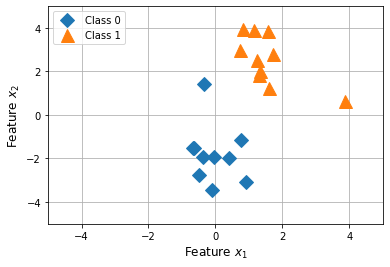

In [ ]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

##Part 1: From Loops to Dot Products

In [2]:
b = 0.0
x = [1.2, 2.2]
w = [3.3, 4.3]

output = b
for x_i, w_i in zip(x, w):
  output += x_i * w_i
print(output)

13.42


In [4]:
b = torch.tensor([0.0])
x = torch.tensor([1.2, 2.2])
w = torch.tensor([3.3, 4.3])

output = x.dot(w) + b
print(output)

tensor([13.4200])


###Benchmark

In [5]:
def plain_python(x, w, b):
  output = b
  for x_i, w_i in zip(x, w):
    output += x_i * w_i
  return output

In [7]:
random.seed(123)

b = 0.0
x = [random.random() for _ in range(1000)]
w = [random.random() for _ in range(1000)]

In [17]:
%%timeit

plain_python(x, w, b)

80.2 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
def pytorch_dot(x, w, b):
  return x.dot(w) + b

In [11]:
t_b = torch.tensor(b)
t_x = torch.tensor(x)
t_w = torch.tensor(w)

In [13]:
%%timeit

pytorch_dot(t_x, t_w, t_b)

5.34 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##Part 2:Matrix Multiplication

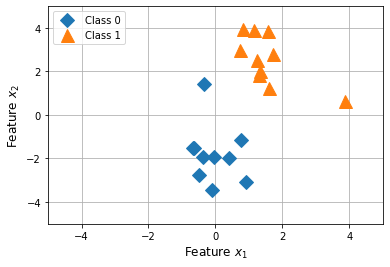

In [ ]:
def plot_boundary(model):
  w1, w2 = model.weights[0], model.weights[1]
  b = model.bias

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_min, x1_max, x2_min, x2_max

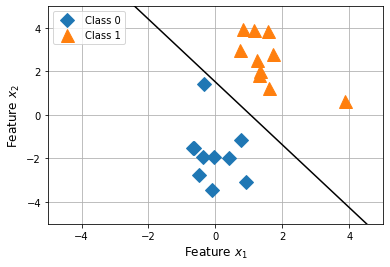

In [ ]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()